In [1]:
!conda install scipy netcdf4 matplotlib basemap basemap-data-hires --yes

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
basemap                   1.1.0                    py36_2    conda-forge
basemap-data-hires        1.1.0                         0    conda-forge
matplotlib                2.1.0                    py36_0    conda-forge
netcdf4                   1.3.0                    py36_0    conda-forge
scipy                     0.19.1          py36_blas_openblas_202  [blas_openblas]  conda-forge


In [2]:
%matplotlib inline

In [3]:
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [4]:
rootgrp = Dataset('http://data.ceda.ac.uk/neodc/casix/seawifs_iop/data/pml_ocean_optical/IOP_ady_412_climatology.nc', 'r')

In [5]:
for var in rootgrp.variables:
    print(var, ':', rootgrp.variables[var].size, ':', rootgrp.variables[var].shape)

time : 12 : (12,)
longitude : 4320 : (4320,)
latitude : 2160 : (2160,)
absorption_coefficient_dy : 111974400 : (12, 2160, 4320)
bounds : 24 : (12, 2)
wavelength : 1 : (1,)


In [6]:
lats = rootgrp['latitude'][:]
lons = rootgrp['longitude'][:]
lat_bnds, lon_bnds = [55.5, 57], [-3.5, 0]
lat_inds = np.where((lats > lat_bnds[0]) & (lats < lat_bnds[1]))[0]
lon_inds = np.where((lons > lon_bnds[0]) & (lons < lon_bnds[1]))[0]

In [7]:
optical = rootgrp.variables['absorption_coefficient_dy']
roi = optical[:, lat_inds, lon_inds]

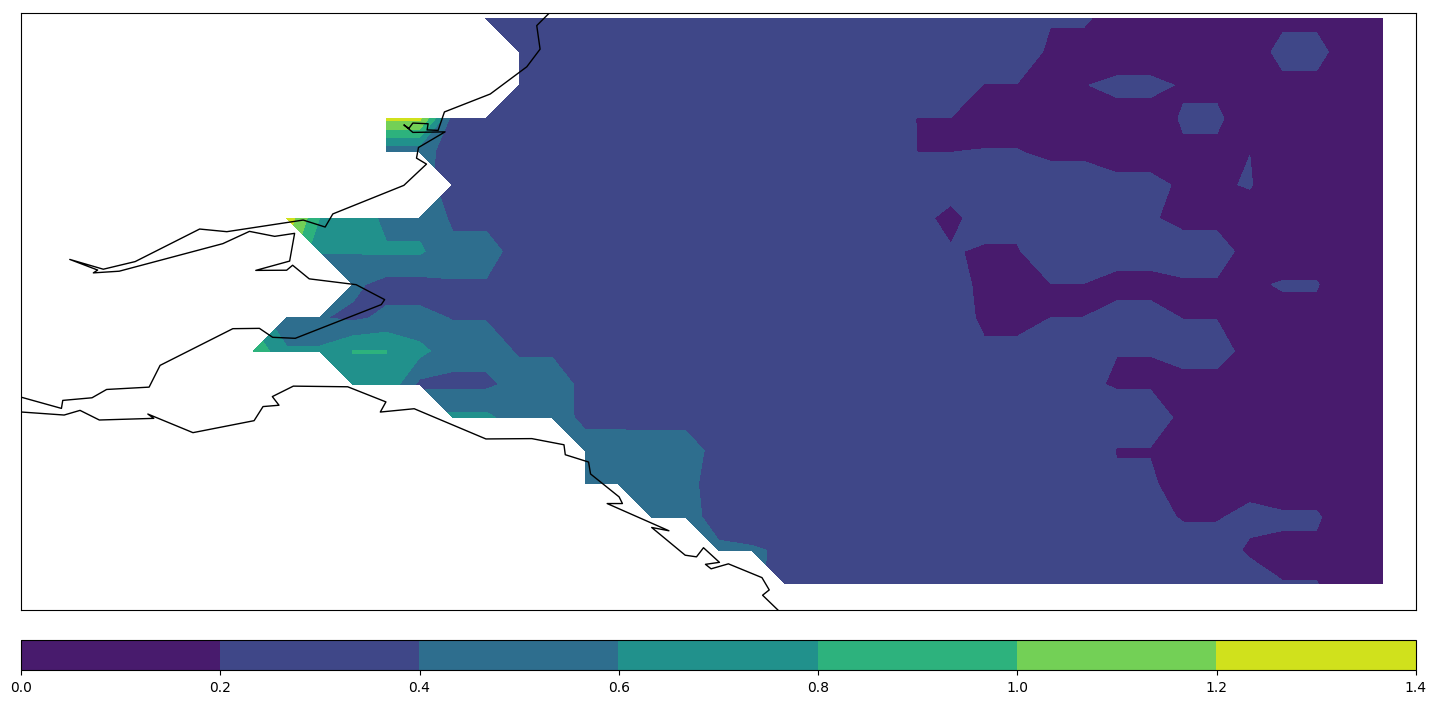

In [8]:
mlons, mlats = np.meshgrid(lons[lon_inds], lats[lat_inds])

fig = plt.figure(figsize=(18, 16), dpi= 100)
map = Basemap(llcrnrlon=-3.5, llcrnrlat=55.5, urcrnrlon=0, urcrnrlat=57,
              resolution='i')
x,y = map(mlons, mlats)
cs = map.contourf(x, y, roi[1,:,:])
map.colorbar(cs, location='bottom', pad="5%")
map.drawcoastlines()

In [9]:
roi_mean = np.mean(roi,(1,2))
time = num2date(rootgrp.variables['time'][:], 'days since 1998-01-01')

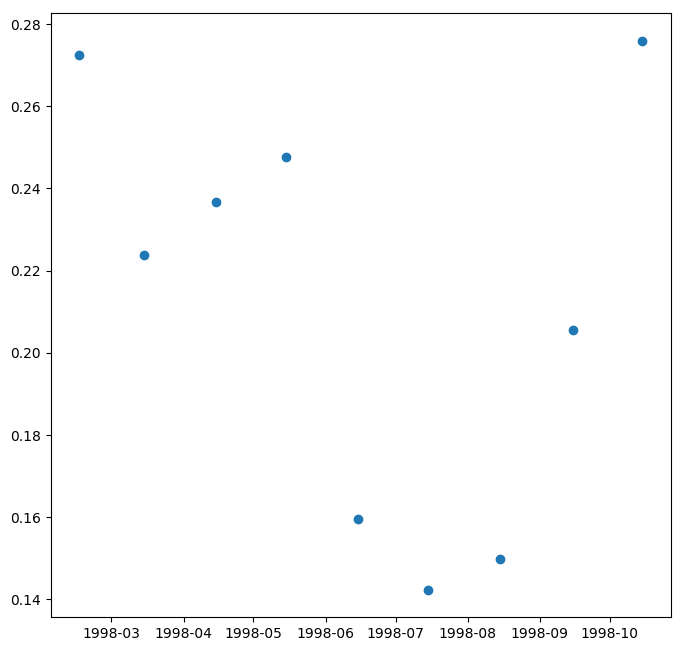

In [10]:
fig = plt.figure(figsize=(8, 8), dpi= 100)
plt.plot_date(time, roi_mean)